## Gaussian Random Fields

In [1]:
using Plots
using GaussianRandomFields

1. Defining the Kernel/Radial Basis Function:
\begin{align}
k_l(x_1, x_2) = exp\left(\frac{−∥x_1 − x_2∥^2}{2l^2}\right)
\end{align}

In [21]:
#Defining the Kernel
l=0.05

Kernel = SquaredExponential(2^0.5*l)

Gaussian (λ=0.07071067811865477, σ=1.0, p=2.0)

In [45]:
function radial_basis_function(l)
    """
    creates our correlation fuction for a given correlation length l
    """
    Kernel = SquaredExponential(2^0.5*l)
    return Kernel
end

function eval_GRF(Kernel,D,n_points=1001)
    """
    This function returns one evaluation of a Gaussian Random Field
    Kernel:    Kernel Function
    D:         Dimensionality
    n_points:  No. of points
    """

    pts = range(0, stop=1, length=n_points)         # 1001 is the number of points
    cov = CovarianceFunction(1, Kernel)         # 1 is theme number of dimensions.
    
    grf = GaussianRandomField(cov,CirculantEmbedding(), pts,minpadding=10000)
    return grf
end

eval_GRF (generic function with 2 methods)

2. Plotting some Evaluations in 1D

┌ Warning: 11246 negative eigenvalues ≥ -5.329070518200751e-15 detected, Gaussian random field will be 
│         approximated (ignoring all negative eigenvalues); increase padding if possible
└ @ GaussianRandomFields C:\Users\jansp\.julia\packages\GaussianRandomFields\xrE65\src\generators\circulant_embedding.jl:93
┌ Warning: 15548 negative eigenvalues ≥ -2.1316282072803006e-14 detected, Gaussian random field will be 
│         approximated (ignoring all negative eigenvalues); increase padding if possible
└ @ GaussianRandomFields C:\Users\jansp\.julia\packages\GaussianRandomFields\xrE65\src\generators\circulant_embedding.jl:93
┌ Warning: 16076 negative eigenvalues ≥ -6.890101002468445e-14 detected, Gaussian random field will be 
│         approximated (ignoring all negative eigenvalues); increase padding if possible
└ @ GaussianRandomFields C:\Users\jansp\.julia\packages\GaussianRandomFields\xrE65\src\generators\circulant_embedding.jl:93


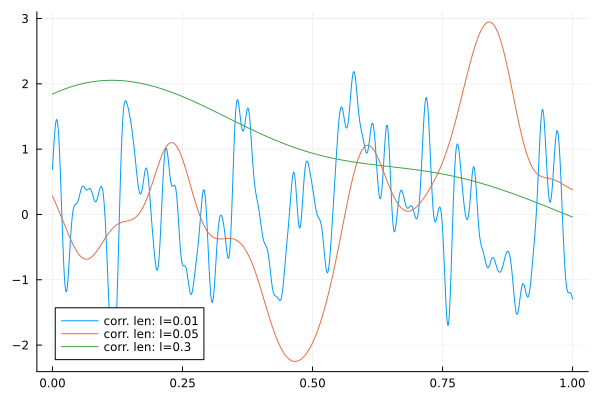

In [47]:
plot()

Dimension=1
for l in [0.01,0.05,0.3]
    Kernel = radial_basis_function(l)
    grf = eval_GRF(Kernel,Dimension)
    plot1D = plot!(grf,label="corr. len: l=$(l)")
end
plot1D = plot!()
#savefig(plot1D,"file.png")


In [29]:
for i in [1,4,0]
   println(i)
end

1
4
0


┌ Warning: 33560013 negative eigenvalues ≥ -5.820766091346741e-11 detected, Gaussian random field will be 
│         approximated (ignoring all negative eigenvalues); increase padding if possible
└ @ GaussianRandomFields C:\Users\jansp\.julia\packages\GaussianRandomFields\xrE65\src\generators\circulant_embedding.jl:93


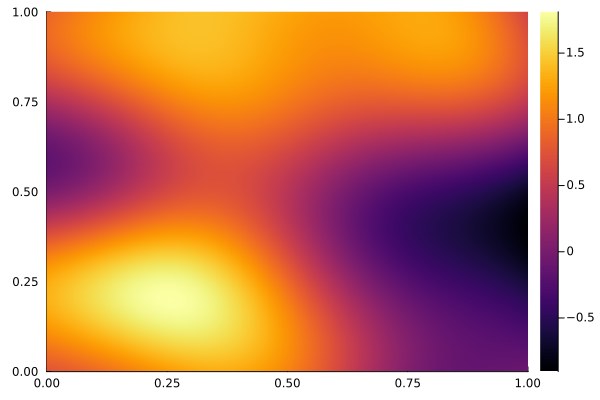

In [44]:
l=0.05
Kernel = SquaredExponential(2^0.5*l)

cov = CovarianceFunction(2, Kernel)
pts = range(0, stop=1, length=1001)
grf = GaussianRandomField(cov, CirculantEmbedding(), pts, pts, minpadding=2001)
heatmap(grf)

┌ Warning: 14962 negative eigenvalues ≥ -2.1316282072803006e-14 detected, Gaussian random field will be 
│         approximated (ignoring all negative eigenvalues); increase padding if possible
└ @ GaussianRandomFields C:\Users\jansp\.julia\packages\GaussianRandomFields\xrE65\src\generators\circulant_embedding.jl:93


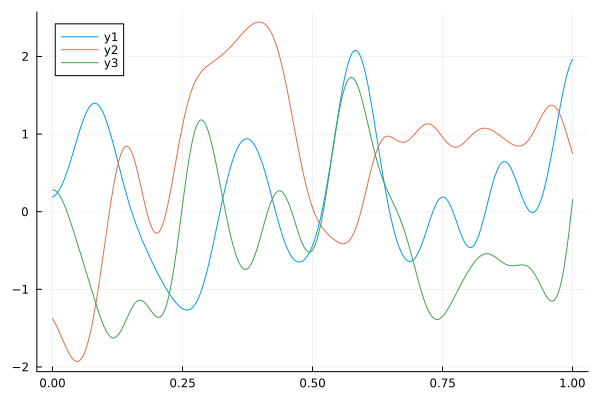